In [88]:
import matplotlib.pyplot as plt
import re
tic_regex = r'IOLoop tic (\d+): (\d+) callbacks (\d+) timeouts'
toc_regex = r'IOLoop toc (\d+): (.*) ms'

def ioticks(filepath):
    with open(filepath) as f:
        lines = f.readlines()
    iterations = [{'lines': []}]
    
    for line in lines:
        tic_match = re.search(tic_regex, line)
        iterations[-1]['lines'].append(line)
        if tic_match:
            iterations.append({
                'callbacks': int(tic_match.groups()[1]),
                'timeouts': int(tic_match.groups()[2]),
                'lines': []
            })
        toc_match = re.search(toc_regex, line)
        if toc_match:
            iterations[-1]['time'] = float(toc_match.groups()[1]) / 1000
            
    return iterations
    

In [140]:
import math
def plot_file(filepath, title):
    iterations = ioticks(filepath)
    #large_only = iterations
    large_only = [i for i in iterations if i.get('time', 0) ]
    plt.plot([i['time'] for i in large_only])
    plt.ylabel('time taken (s)')
    plt.xlabel('tic count')
    plt.title(title)
    plt.show()


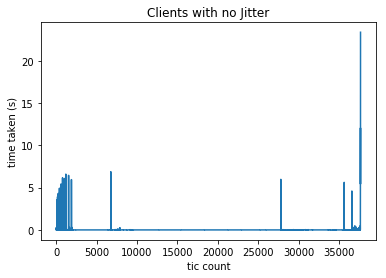

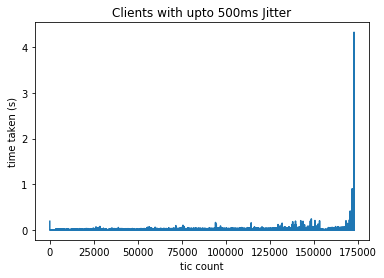

In [143]:
#plot_file('hublogs-2')
#plot_file('hublogs-cpython')
#plot_file('hublogs-no-poll')
plot_file('hublogs/spawner-notify-hub-jitter-client-nojitter', 'Clients with no Jitter')
plot_file('hublogs/client-jitter-500ms', 'Clients with upto 500ms Jitter')
#plot_file('hublogs-deletion')

In [132]:
def large_tics(filepath):
    iterations = ioticks(filepath)
    large_only = [i for i in iterations if i.get('time', 0) > 10]
    return large_only

t = large_tics("hublogs/spawner-notify-hub-jitter-client-nojitter")

In [133]:
len(t)

6

In [130]:
with open('long-tick', 'w') as w:
    for ti in t:
        w.write('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\n')
        for l in ti['lines']:
            w.write(l)
    